In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
df = pd.read_csv("churn-bigml-80.csv")
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [20]:
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

In [21]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

In [22]:
X

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,40,79,415,0,0,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2
2662,3,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2
2663,49,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3
2664,39,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2


In [23]:
y

,Churn
0,False
1,False
2,False
3,False
4,False
...,...
2661,False
2662,False
2663,False
2664,False


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [25]:
X_train

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
1229,20,102,415,0,0,0,271.1,80,46.09,172.0,133,14.62,169.2,105,7.61,10.3,5,2.78,1
2001,26,157,408,0,0,0,240.2,67,40.83,153.0,98,13.01,249.0,72,11.21,10.2,6,2.75,2
1421,43,79,415,0,0,0,144.0,90,24.48,135.8,91,11.54,212.4,129,9.56,13.0,4,3.51,1
1346,32,132,408,0,0,0,169.9,107,28.88,209.4,121,17.80,206.1,79,9.27,11.5,2,3.11,1
86,3,95,408,0,0,0,238.1,65,40.48,187.2,98,15.91,190.0,115,8.55,11.8,4,3.19,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,20,70,408,0,0,0,170.2,98,28.93,155.2,102,13.19,228.6,76,10.29,15.0,2,4.05,1
104,25,61,510,0,1,27,187.5,124,31.88,146.6,103,12.46,225.7,129,10.16,6.4,6,1.73,4
377,1,41,510,0,1,34,194.4,63,33.05,254.9,110,21.67,160.2,115,7.21,17.2,9,4.64,2
1123,1,96,415,1,0,0,200.6,117,34.10,289.5,120,24.61,98.3,95,4.42,11.2,5,3.02,2


In [26]:
X_test

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
1396,11,146,510,0,0,0,189.3,77,32.18,155.9,128,13.25,186.0,83,8.37,7.4,3,2.00,0
542,5,71,415,0,0,0,277.5,104,47.18,131.8,121,11.20,126.9,101,5.71,8.2,2,2.21,1
2275,45,99,510,0,0,0,128.3,78,21.81,215.3,120,18.30,143.7,140,6.47,14.3,9,3.86,2
1302,42,68,415,0,0,0,222.8,99,37.88,175.8,85,14.94,202.0,111,9.09,11.0,3,2.97,3
560,41,168,415,0,1,22,175.9,70,29.90,211.7,105,17.99,174.5,81,7.85,7.3,5,1.97,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1728,48,143,510,0,0,0,194.3,99,33.03,123.6,133,10.51,229.5,99,10.33,10.2,2,2.75,2
51,4,116,415,0,1,34,268.6,83,45.66,178.2,142,15.15,166.3,106,7.48,11.6,3,3.13,2
1197,24,22,408,0,1,14,199.1,100,33.85,221.8,103,18.85,65.7,91,2.96,4.2,1,1.13,1
2271,32,147,408,1,0,0,183.8,113,31.25,164.7,110,14.00,111.0,87,5.00,10.1,4,2.73,1


In [27]:
y_train

,Churn
1229,False
2001,False
1421,False
1346,False
86,False
...,...
66,False
104,True
377,False
1123,False


In [28]:
y_test

,Churn
1396,False
542,False
2275,False
1302,False
560,False
...,...
1728,False
51,False
1197,False
2271,False


In [29]:
rf = RandomForestClassifier(random_state=42)

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}



In [30]:
grid = GridSearchCV(rf,param_grid,cv=5,scoring="f1",n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='f1')

In [31]:
best_model = grid.best_estimator_
print("Best Parameters:", grid.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [32]:
y_pred = best_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[455   1]
 [ 24  54]]


In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.95      1.00      0.97       456
        True       0.98      0.69      0.81        78

    accuracy                           0.95       534
   macro avg       0.97      0.85      0.89       534
weighted avg       0.95      0.95      0.95       534



In [34]:
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring="f1")
print("Cross-validation F1 scores:", cv_scores)

Cross-validation F1 scores: [0.8115942  0.72868217 0.85106383 0.82352941 0.83823529]


In [35]:
print("Mean F1 score:", cv_scores.mean())

Mean F1 score: 0.8106209818221546


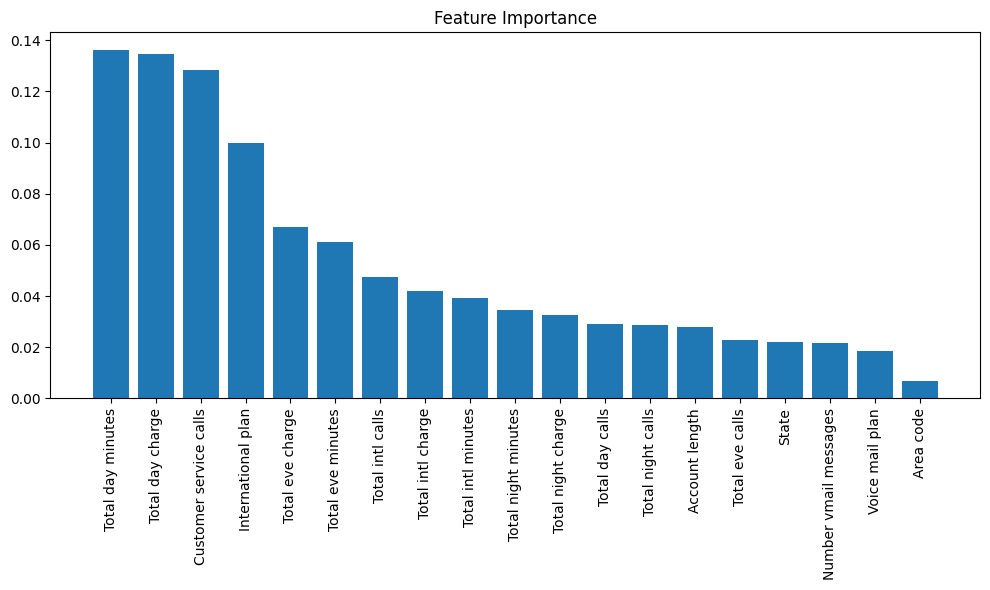

In [36]:
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("Feature Importance")
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()